In [16]:
import lightkurve as lk
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
import pandas as pd

%matplotlib inline


In [17]:
# print python version
import sys
print(sys.version)


3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)]


In [18]:
# Load the ./data/tess-stitched/allesfitter_converted/4409-tess-lightcurves-1800s_converted.csv file
lc = pd.read_csv('c:/HOME/Work/asteptess/asteptesss-4409/data/tess-stitched/allesfitter_converted/4409-tess-lightcurves-1800s_converted.csv')
# Print cwd
# import os
# cwd = os.getcwd()
# print(cwd)

# Load it in lightkurve
lc = lk.LightCurve(time=lc['time'], flux=lc['flux'], flux_err=lc['flux_err'])

In [19]:

# Replace 'path_to_fits_file.fits' with the path to your FITS file
# lc = lk.read('/home/preller/h/workspace/astep-tess-targets/astep-tess-targets/toi4409/4409-lightcurve-stitched.fits')
# lc = lk.read('./4409-lightcurve-stitched.fits')

# # If the FITS file is a LightCurveFile, you can access the PDCSAP flux (or SAP flux) as a LightCurve object:
# if isinstance(lc_file, lk.LightCurveFile):
#     lc = lc_file.PDCSAP_FLUX

# # If the FITS file is already a LightCurve, then you have the data directly:
# elif isinstance(lc_file, lk.LightCurve):
#     lc = lc_file

In [20]:
type(lc)

lightkurve.lightcurve.LightCurve

<Axes: xlabel='Time [JD]', ylabel='Flux'>

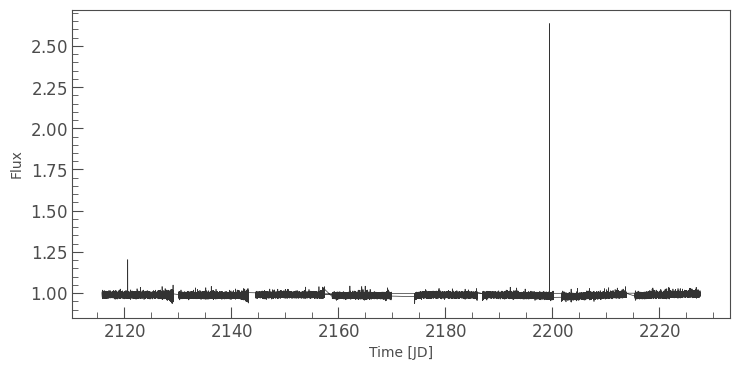

In [21]:
lc.plot()

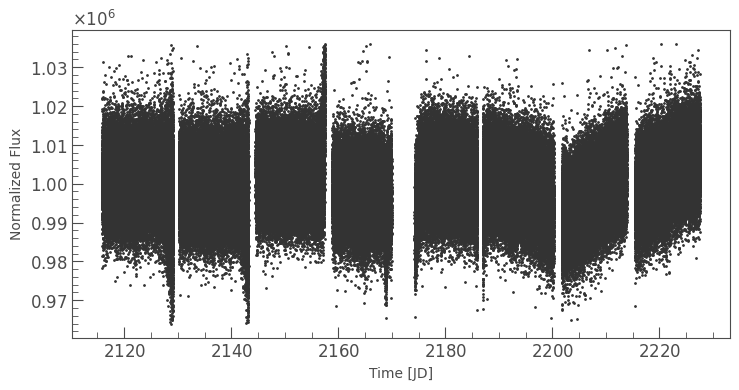

In [22]:
lc_processed = lc.normalize(unit='ppm').remove_nans().remove_outliers()
lc_processed.scatter();

In [23]:
# Export the data as a CSV file
# lc_processed.to_csv('toi4409-full-tess-stitched-nonans.csv')

In [31]:
# Filter the data to reduce size

def filter_data(df, period, t0, offset):
    """
    Filter the DataFrame based on the provided criteria.
    
    Parameters:
    - df: DataFrame containing the lightcurve data
    - period: period of the lightcurve
    - t0: initial time value
    - offset: offset value in days
    
    Returns:
    - A new DataFrame containing the filtered data
    """
    # Calculate the time values that are multiples of the period from t0
    max_time = df['time'].max()
    min_time = df['time'].min()
    periods = [(t0 + period * i) for i in range(int((max_time - t0) / period) + 1) if (t0 + period * i) >= min_time]
    # Print periods
    print(periods)
    
    # Filter the data to keep only rows where the time is within the specified offset of the calculated values
    mask = pd.concat([((df['time'] >= p - offset) & (df['time'] <= p + offset)) for p in periods]).groupby(level=0).any()
    filtered_df = df[mask]
    
    return filtered_df

# Open the csv file
# df = pd.read_csv('toi4409-full-tess-stitched-nonans.csv')

df = pd.read_csv('c:/HOME/Work/asteptess/asteptesss-4409/data/tess-stitched/raw/toi4409-full-tess-stitched-nonans-filtered1day-sorted_converted.csv')

# Apply the filter to the original data
# filtered_df = filter_data(df, period=92.492, t0=2076.346853, offset=1)
filtered_df = filter_data(df, period=92.492, t0=41.522853, offset=1) # t0 is now 2076.346853 - 92.492 * 22

filtered_df.head()


[1336.410853, 1428.902853, 1521.394853, 1613.886853, 1706.378853, 1798.8708530000001, 1891.362853, 1983.854853, 2076.346853, 2168.838853, 2261.330853, 2353.822853, 2446.314853, 2538.806853, 2631.2988530000002, 2723.790853, 2816.282853, 2908.774853, 3001.266853, 3093.7588530000003]


,time,flux,flux_err
0,1335.427156,1.000000,0.000693
1,1335.447990,0.999506,0.000693
2,1335.468824,0.998679,0.000692
3,1335.489657,0.999402,0.000692
4,1335.510491,1.001409,0.000692


In [32]:
# all_tess_data = pd.read_csv('./toi4409-full-tess-stitched-nonans-filtered1day-sorted_converted')
all_tess_data = pd.read_csv('c:/HOME/Work/asteptess/asteptesss-4409/data/tess-stitched/raw/toi4409-full-tess-stitched-nonans-filtered1day-sorted_converted.csv')

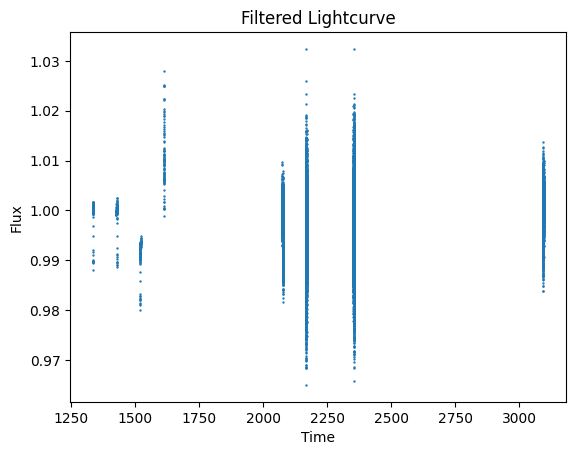

In [33]:
# Plot the results
plt.scatter(filtered_df['time'], filtered_df['flux'], s=0.5)
plt.xlabel('Time')
plt.ylabel('Flux')
plt.title('Filtered Lightcurve')
plt.show()


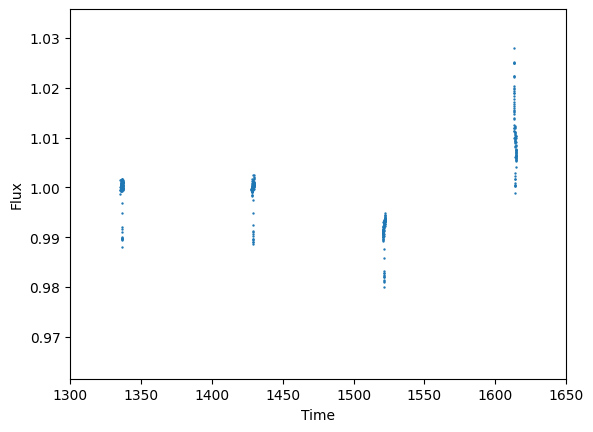

In [34]:
# Plot only from 1500 to 2000
plt.scatter(filtered_df['time'], filtered_df['flux'], s=0.5)
plt.xlim(1300, 1650)
plt.xlabel('Time')
plt.ylabel('Flux')
plt.show()


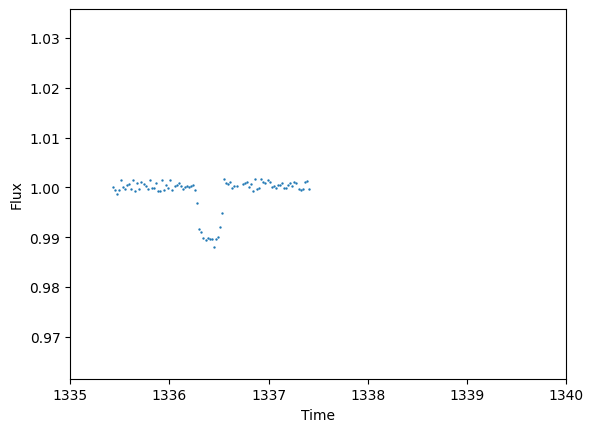

In [36]:
# Plot only from 1500 to 2000
plt.scatter(filtered_df['time'], filtered_df['flux'], s=0.5)
plt.xlim(1335, 1340)
plt.xlabel('Time')
plt.ylabel('Flux')
plt.show()


In [37]:
# Sort the csv by the time column
sorted_filtered_df = filtered_df.sort_values(by=['time'], inplace=False)

# Save the filtered data to a csv file
sorted_filtered_df.to_csv('toi4409-full-tess-stitched-nonans-filtered1day-sorted.csv', index=False)

In [38]:
# Open toi4409-full-tess-stitched-nonans-filtered1day-sorted.csv as a df
df = pd.read_csv('toi4409-full-tess-stitched-nonans-filtered1day-sorted.csv')

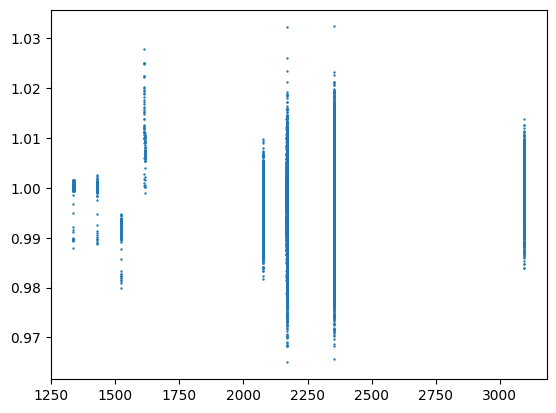

In [39]:
# Plot the results
plt.scatter(df['time'], df['flux'], s=0.5)

In [40]:
# For 

In [41]:
# Check if the time column is sorted
timevals = filtered_df['time']
sortedvals = timevals.sort_values(ascending=True)
print(timevals.equals(sortedvals))

# Print both timevals and sortedvals first 20
print(timevals.head(10))
print(sortedvals.head(10))


False
0    1335.427156
1    1335.447990
2    1335.468824
3    1335.489657
4    1335.510491
5    1335.531325
6    1335.552158
7    1335.572992
8    1335.593826
9    1335.614660
Name: time, dtype: float64
0    1335.427156
1    1335.447990
2    1335.468824
3    1335.489657
4    1335.510491
5    1335.531325
6    1335.552158
7    1335.572992
8    1335.593826
9    1335.614660
Name: time, dtype: float64


<Axes: xlabel='Time [JD]', ylabel='Normalized Flux'>

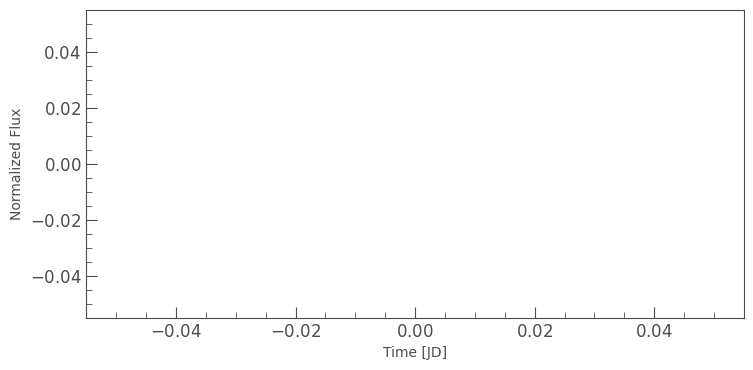

In [42]:
# Extract only 0.5 days around the transit time
t0 = (2459076.346853) + 92.492*0 # BJD, 2076.346853
t1 = t0 - 0.5
t2 = t0 + 0.5

# Use .jd to convert the Time to Julian Date for the comparison
lc_processed_extractedsingle = lc_processed[(lc_processed.time.jd > t1) & (lc_processed.time.jd < t2)]

# Plot the extracted data
lc_processed_extractedsingle.scatter()

# print lc_processed.time.jd
# print(lc_processed.time.jd)

# print(type(lc_processed.time))

<Axes: xlabel='Time [JD]', ylabel='Normalized Flux'>

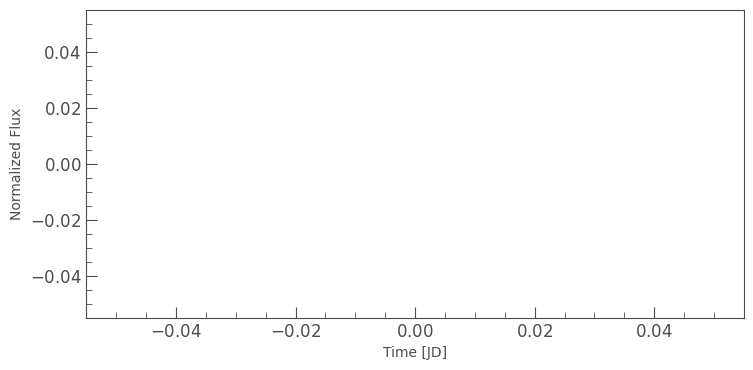

In [43]:
# Extract only 0.5 days around the transit time
t0 = (2459076.346853) + 92.492*(-8) # BJD, 2076.346853
t1 = t0 - 0.5
t2 = t0 + 1.5

# Use .jd to convert the Time to Julian Date for the comparison
lc_processed_extractedsingle = lc_processed[(lc_processed.time.jd > t1) & (lc_processed.time.jd < t2)]

# Plot the extracted data
lc_processed_extractedsingle.scatter()

# print lc_processed.time.jd
# print(lc_processed.time.jd)

# print(type(lc_processed.time))

<Axes: xlabel='Time [JD]', ylabel='Normalized Flux'>

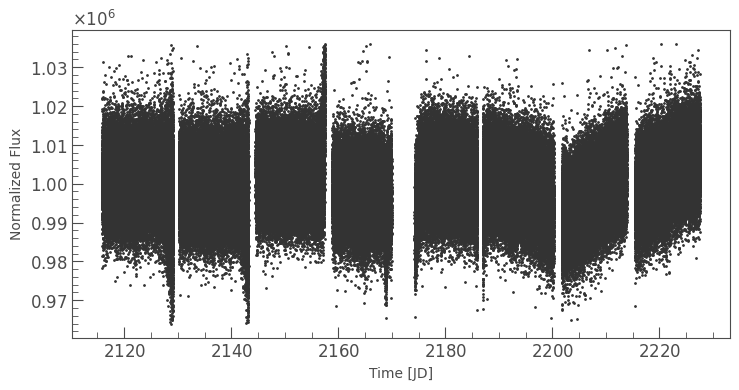

In [44]:
lc_processed_extractedsingle = lc_processed[lc_processed.time.jd < t2]
# Plot
lc_processed_extractedsingle.scatter()

In [45]:
# Save this test single initial transit
lc_processed_extractedsingle.to_csv('toi4409-tess-stitched-single-initial-test.csv')

In [46]:
# Print the type of lc_processed
type(lc_processed)

lightkurve.lightcurve.LightCurve

In [48]:
# Plot the to4409-manual-bin.csv data, load it first
# lc_manual = lk.read('toi4409-manual-bin.csv')
# import pandas as pd
# # 1. Read the CSV file using pandas
# df = pd.read_csv('toi4409-manual-bin.csv')

# # 2. Extract the time and flux columns
# time = df['time'].values
# flux = df['flux'].values

# # 3. Create a LightCurve object
# lc = lk.LightCurve(time=time, flux=flux)

<Axes: xlabel='Time [JD]', ylabel='Flux'>

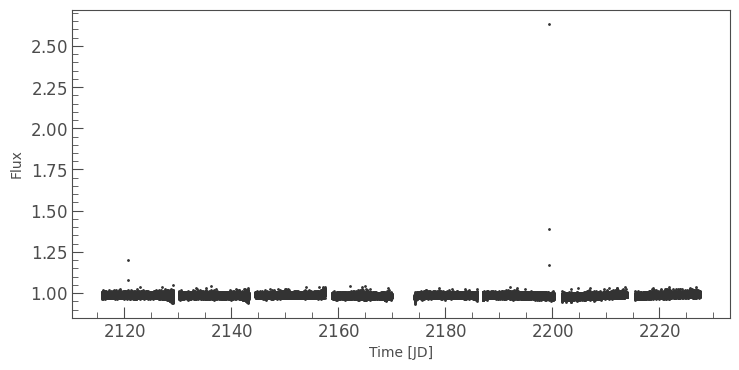

In [49]:
# 4. Plot the LightCurve
lc.scatter()

In [50]:
# Load the df
# df = pd.read_csv('toi4409

# Load the df as a lightcurve
paperprep_lcs = lk.LightCurve(df['time'].values, df['flux'].values, df['flux_err'].values)

C:\Users\patri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\lightkurve\lightcurve.py:278: LightkurveDeprecationWarning: passing flux as a positional argument is deprecated, please use ``flux=...`` instead.
  warnings.warn(


<Axes: xlabel='Time [JD]', ylabel='Flux'>

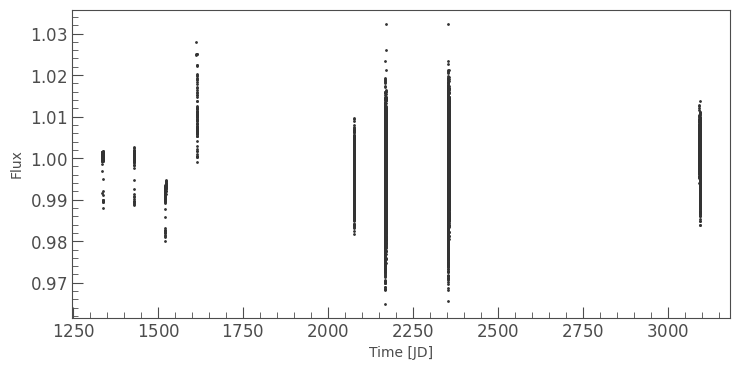

In [51]:
# Load the df as a lightcurve
paperprep_lcs = lk.LightCurve(df['time'].values, df['flux'].values, df['flux_err'].values)

# Plot the lightcurve
paperprep_lcs.scatter()

C:\Users\patri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\lightkurve\lightcurve.py:278: LightkurveDeprecationWarning: passing flux as a positional argument is deprecated, please use ``flux=...`` instead.
  warnings.warn(


<Axes: xlabel='Time [JD]', ylabel='Flux'>

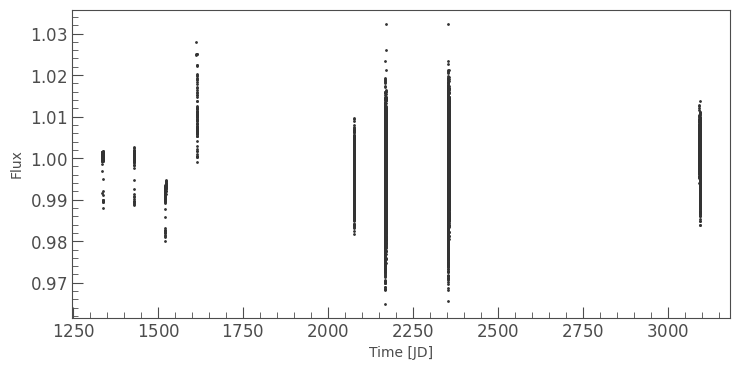

In [52]:
# df = pd.read_csv('toi4409-full-tess-stitched-nonans.csv')
# # Sort the csv by the time column
# df = filtered_df.sort_values(by=['time'], inplace=False)
df = pd.read_csv('toi4409-full-tess-stitched-nonans-filtered1day-sorted.csv')

# Load the df as a lightcurve
paperprep_lcs = lk.LightCurve(df['time'].values, df['flux'].values, df['flux_err'].values)

# Plot the lightcurve
paperprep_lcs.scatter()

# # Extract only 0.5 days around the transit time
# t0 = (2459076.346853) + 92.492*0 # BJD, 2076.346853
# t1 = t0 - 1000.5
# t2 = t0 + 1000.5

# # Use .jd to convert the Time to Julian Date for the comparison
# lc_processed_extractedsingle = paperprep_lcs[(paperprep_lcs.time.jd > t1) & (paperprep_lcs.time.jd < t2)]

# # Plot the extracted data
# lc_processed_extractedsingle.scatter()

# print lc_processed.time.jd
# print(lc_processed.time.jd)

# print(type(lc_processed.time))

In [53]:
# import lightkurve as lk
# import numpy as np

def plot_transit_windows(lightcurve, t0, period, times, x):
    """
    Plots the lightcurve data around specific transit windows.
    
    Parameters:
    - lightcurve: Lightkurve's LightCurve object.
    - t0: Transit midpoint.
    - period: Orbital period.
    - times: List of integer multipliers for the period.
    - x: Number of days around each transit to display.
    """
    
    # Create a figure
    plt.figure(figsize=(14, 8))
    
    # For each multiplier in times, plot the data around the transit window
    for time_multiplier in times:
        transit_time = t0 + period * time_multiplier
        mask = (lightcurve.time.jd > transit_time - x) & (lightcurve.time.jd < transit_time + x)
        
        # Plot the data within the mask
        plt.errorbar(lightcurve.time[mask].value, lightcurve.flux[mask], yerr=lightcurve.flux_err[mask], fmt='.k', ecolor='gray', elinewidth=0.5, capsize=2, label=f"Multiplier: {time_multiplier}")

    plt.xlabel('Time (days)')
    plt.ylabel('Flux')
    plt.legend()
    plt.title(f"Lightcurve Data around Transit Windows")
    plt.tight_layout()
    plt.show()

# The function definition is provided, and the sample usage is commented out for reference.
# Uncommenting the below lines will demonstrate the function, but we need a sample lightcurve and parameters for it to work.

# Sample usage:
# paperprep_lcs = lk.LightCurve(data['# time'].values, data['flux'].values, data['flux_err'].values)
# plot_transit_windows(paperprep_lcs, t0=2, period=1, times=[1, 2, 3], x=0.5)


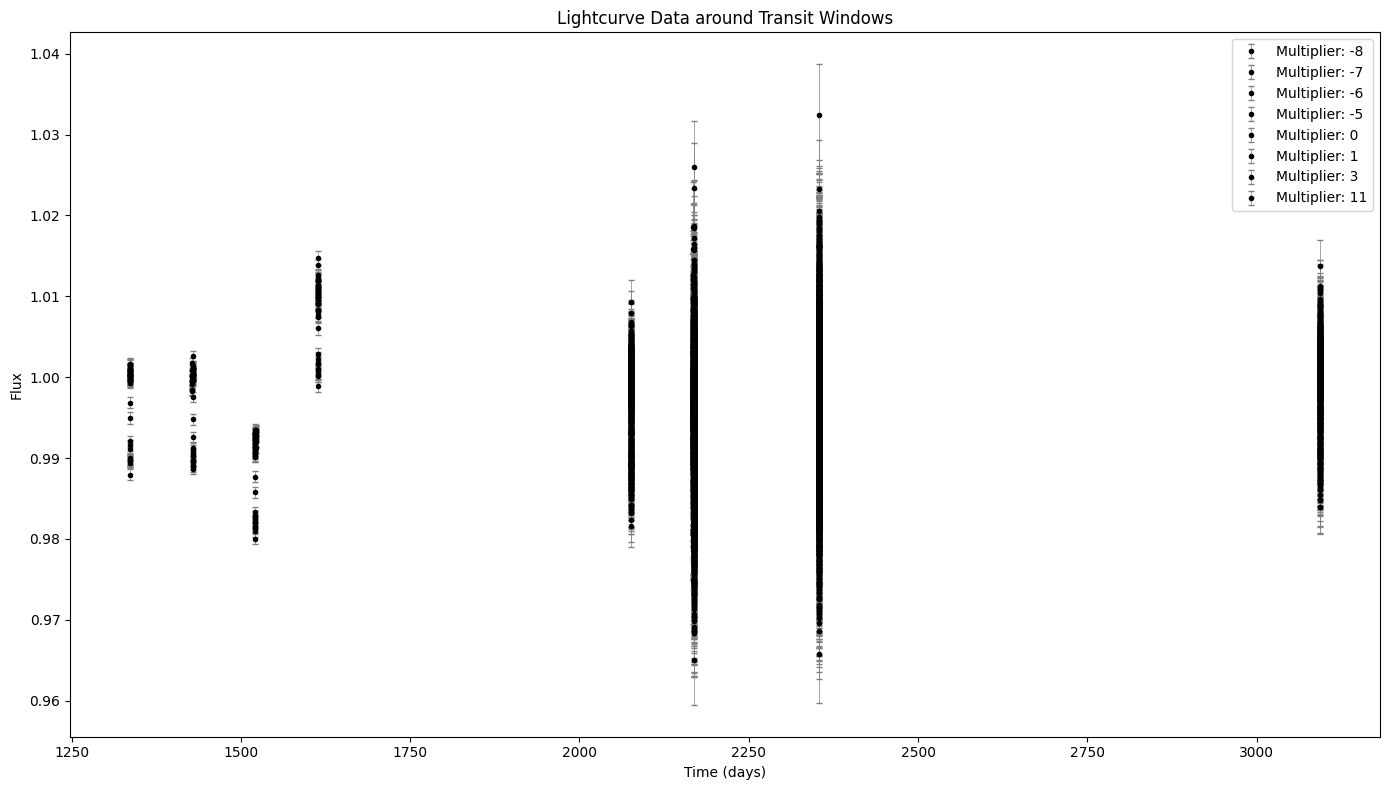

In [54]:
plot_transit_windows(paperprep_lcs, t0=2076.346853, period=92.492, times=[-8, -7, -6, -5, 0, 1, 3, 11], x=0.5)

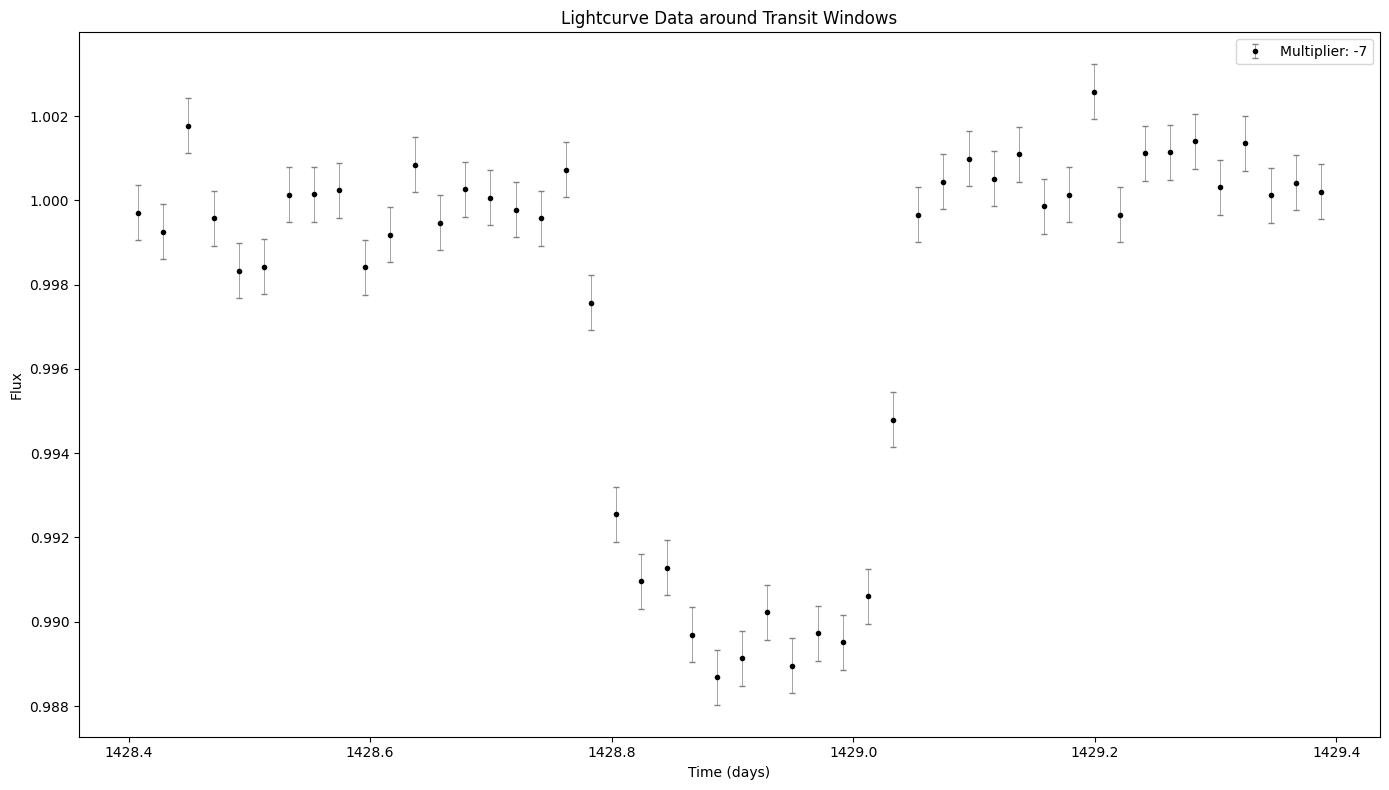

In [55]:
plot_transit_windows(paperprep_lcs, t0=2076.346853, period=92.492, times=[-7], x=0.5)

In [56]:
def plot_specific_transit_windows(lightcurve, t0, period, x, start_multiplier, end_multiplier):
    """
    Plots the lightcurve data around specific transit windows that have at least one data point inside the specified range.
    
    Parameters:
    - lightcurve: Lightkurve's LightCurve object.
    - t0: Transit midpoint.
    - period: Orbital period.
    - x: Number of days around each transit to display.
    - start_multiplier: Start of the range of multipliers for the period.
    - end_multiplier: End of the range of multipliers for the period.
    """
    
    # Convert the lightcurve time to Julian Date for comparison
    lc_time_jd = lightcurve.time.jd
    
    # For each multiplier in the specified range
    for time_multiplier in range(start_multiplier, end_multiplier + 1):
        transit_time = t0 + period * time_multiplier
        mask = (lc_time_jd > transit_time - x) & (lc_time_jd < transit_time + x)
        
        # Check if there's at least one data point inside the window
        if np.any(mask):
            # Plot the data within the mask in a separate figure
            plt.figure(figsize=(10, 6))
            plt.errorbar(lc_time_jd[mask], lightcurve.flux[mask], yerr=lightcurve.flux_err[mask], fmt='.k', ecolor='gray', elinewidth=0.5, capsize=2, label=f"Multiplier: {time_multiplier}")
            plt.xlabel('Time (JD)')
            plt.ylabel('Flux')
            plt.legend()
            plt.title(f"Lightcurve Data around Transit Window (Multiplier: {time_multiplier})")
            plt.tight_layout()
            plt.show()

# The function definition is provided.
# You can use this function in your environment with the 'lightkurve' library.


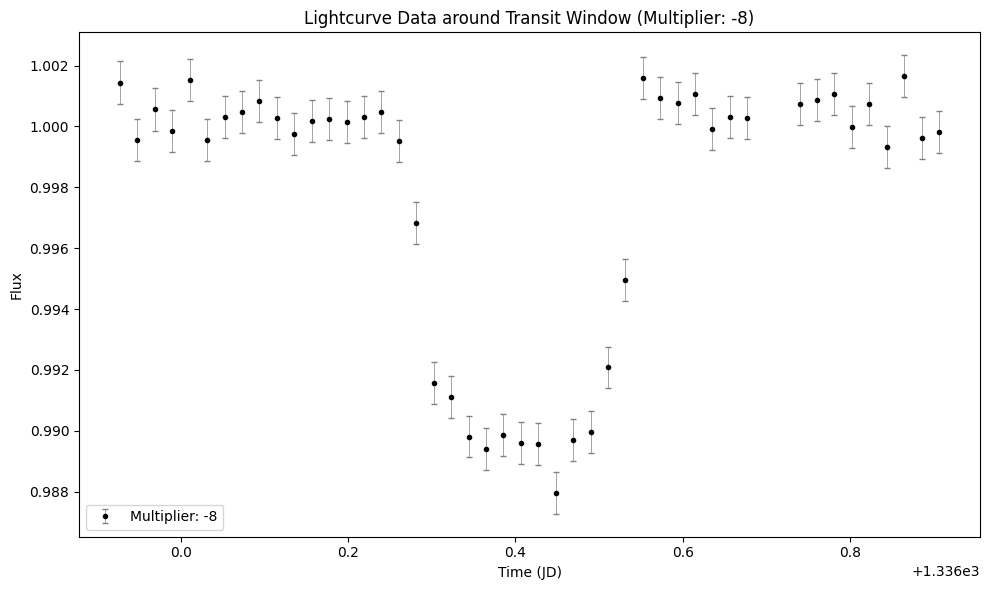

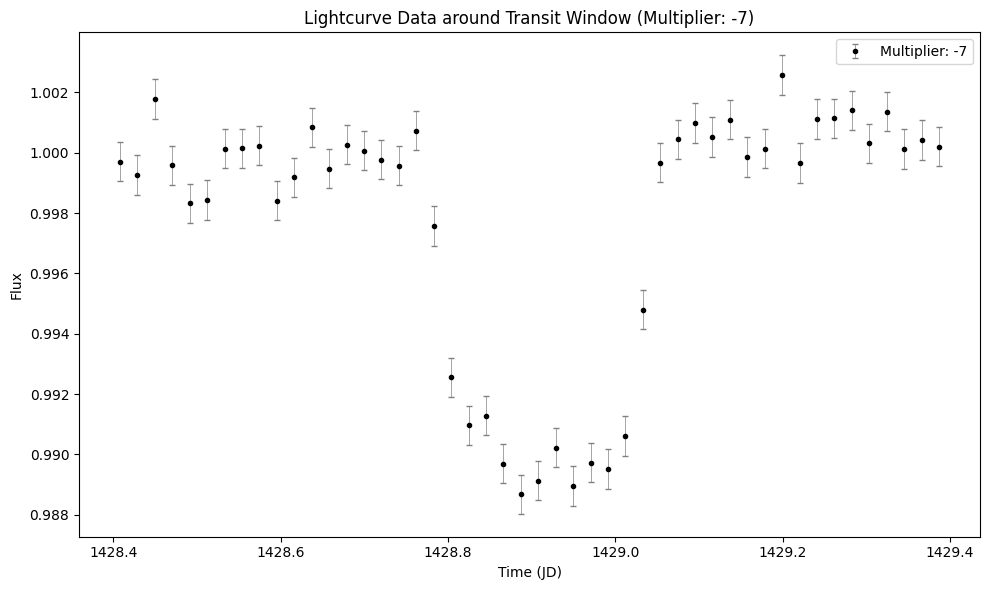

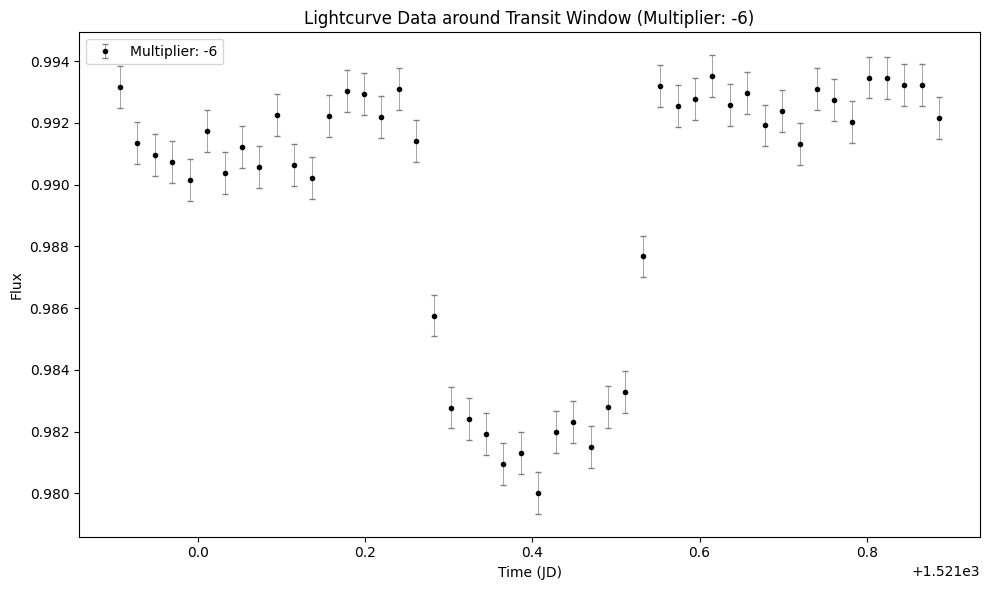

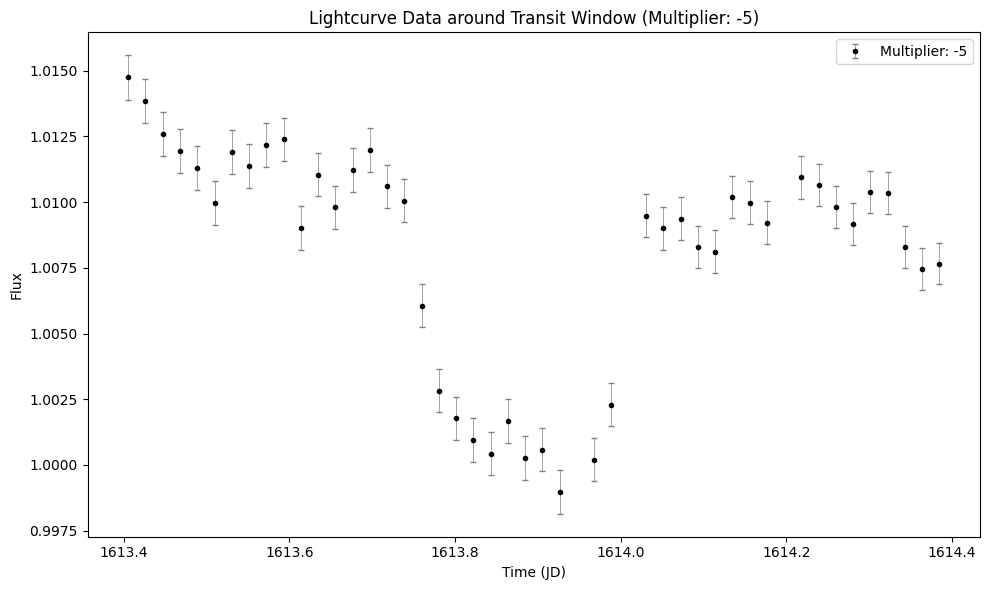

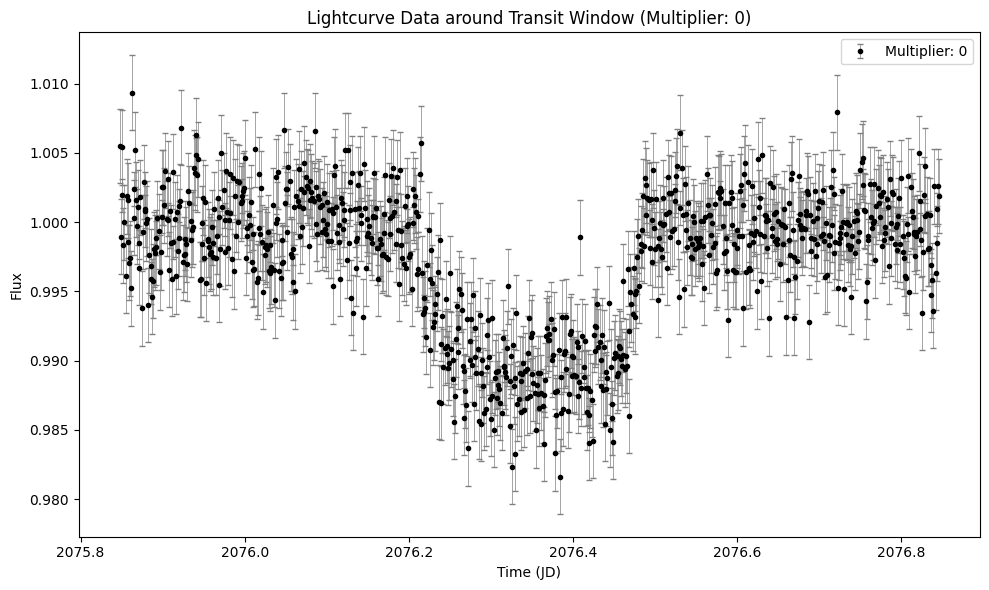

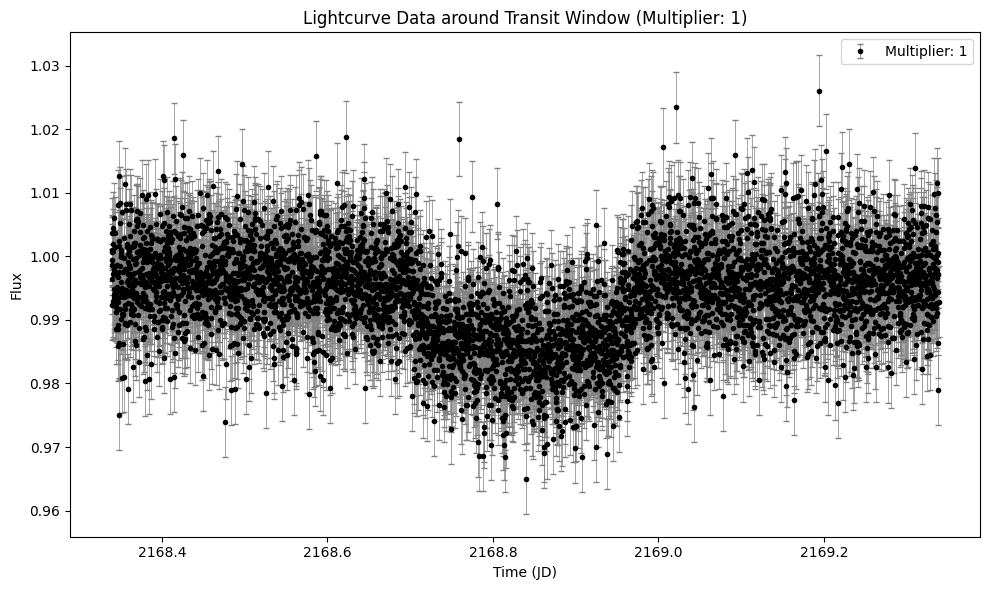

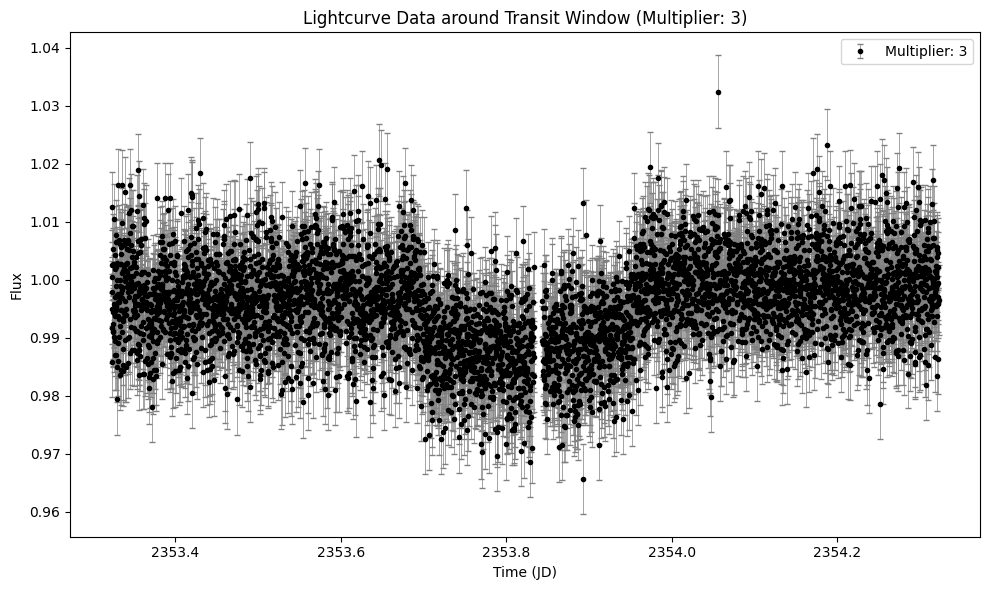

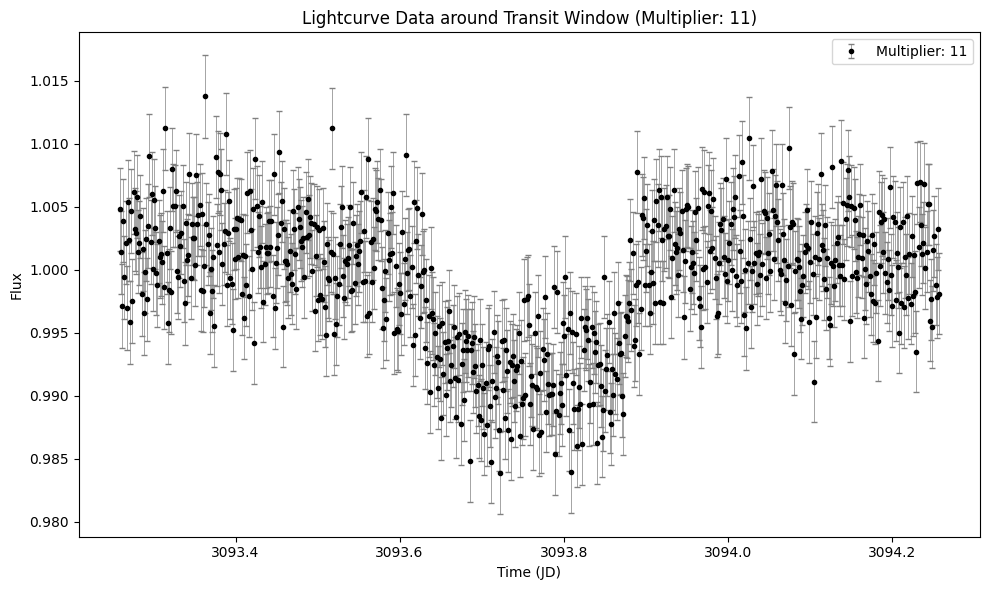

In [57]:
plot_specific_transit_windows(paperprep_lcs, t0=2076.346853, period=92.492, x=0.5, start_multiplier=-8, end_multiplier=11)

In [75]:
import numpy as np
import matplotlib.pyplot as plt

def fixed_final_plot_transit_windows_grid(lightcurve, t0, period, x, start_multiplier, end_multiplier, 
                                          n_columns, x_label, y_label, y_scale=1, 
                                          subplot_title="", main_title="", save_path=None, offset_jd=0):
    """
    Plots the lightcurve data around specific transit windows in a grid layout.
    
    Parameters:
    - lightcurve: Lightkurve's LightCurve object.
    - t0: Transit midpoint.
    - period: Orbital period.
    - x: Number of days around each transit to display.
    - start_multiplier: Start of the range of multipliers for the period.
    - end_multiplier: End of the range of multipliers for the period.
    - n_columns: Number of columns for the grid layout.
    - x_label: Label for the x-axis.
    - y_label: Label for the y-axis.
    - y_scale: Scaling factor for the y-axis (default is 1).
    - subplot_title: Title for each subplot (default is empty).
    - main_title: Title for the main plot.
    - offset_jd: Offset to be applied to the x-axis labels (default is 0).
    """
    
    # Convert the lightcurve time to Julian Date for comparison
    lc_time_jd = lightcurve.time.jd
    
    # Collect valid multipliers
    valid_multipliers = []
    
    for time_multiplier in range(start_multiplier, end_multiplier + 1):
        transit_time = t0 + period * time_multiplier
        mask = (lc_time_jd > transit_time - x) & (lc_time_jd < transit_time + x)
        
        # Check if there's at least one data point inside the window
        if np.any(mask):
            valid_multipliers.append(time_multiplier)
    
    # Calculate the number of rows for the grid layout
    n_rows = int(np.ceil(len(valid_multipliers) / n_columns))
    
    # Create the grid plot
    fig, axs = plt.subplots(n_rows, n_columns, figsize=(4*n_columns, 4*n_rows))
    
    # Handle the case for single row
    if n_rows == 1:
        axs = np.expand_dims(axs, axis=0)
    
    for i, ax in enumerate(axs.ravel()):
        if i < len(valid_multipliers):
            time_multiplier = valid_multipliers[i]
            transit_time = t0 + period * time_multiplier
            mask = (lc_time_jd > transit_time - x) & (lc_time_jd < transit_time + x)
            
            ax.errorbar(lc_time_jd[mask], lightcurve.flux[mask] / y_scale, yerr=lightcurve.flux_err[mask] / y_scale, fmt='.k', ecolor='gray', elinewidth=0.5, capsize=2)
            ax.set_title(subplot_title)

            # Adjust x-axis labels by the offset
            ax.set_xlabel(x_label)
            new_xticks = ax.get_xticks() + offset_jd
            ax.set_xticklabels(new_xticks)

            ax.set_ylabel(y_label)
        else:
            ax.axis('off')  # Turn off any additional subplots
    
    # Adjusting suptitle positioning
    plt.suptitle(main_title, y=1.05)
    plt.tight_layout()
    
    # If save path is provided, save the figure
    if save_path:
        plt.savefig(save_path, bbox_inches='tight')
        
    plt.show()


In [73]:
# Given paperprep_lcs, sum -1000 to each time.jd value
# paperprep_lcs.time.jd = paperprep_lcs.time.jd + 1000

C:\Users\patri\AppData\Local\Temp\ipykernel_44984\2280870471.py:62: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_xticks)


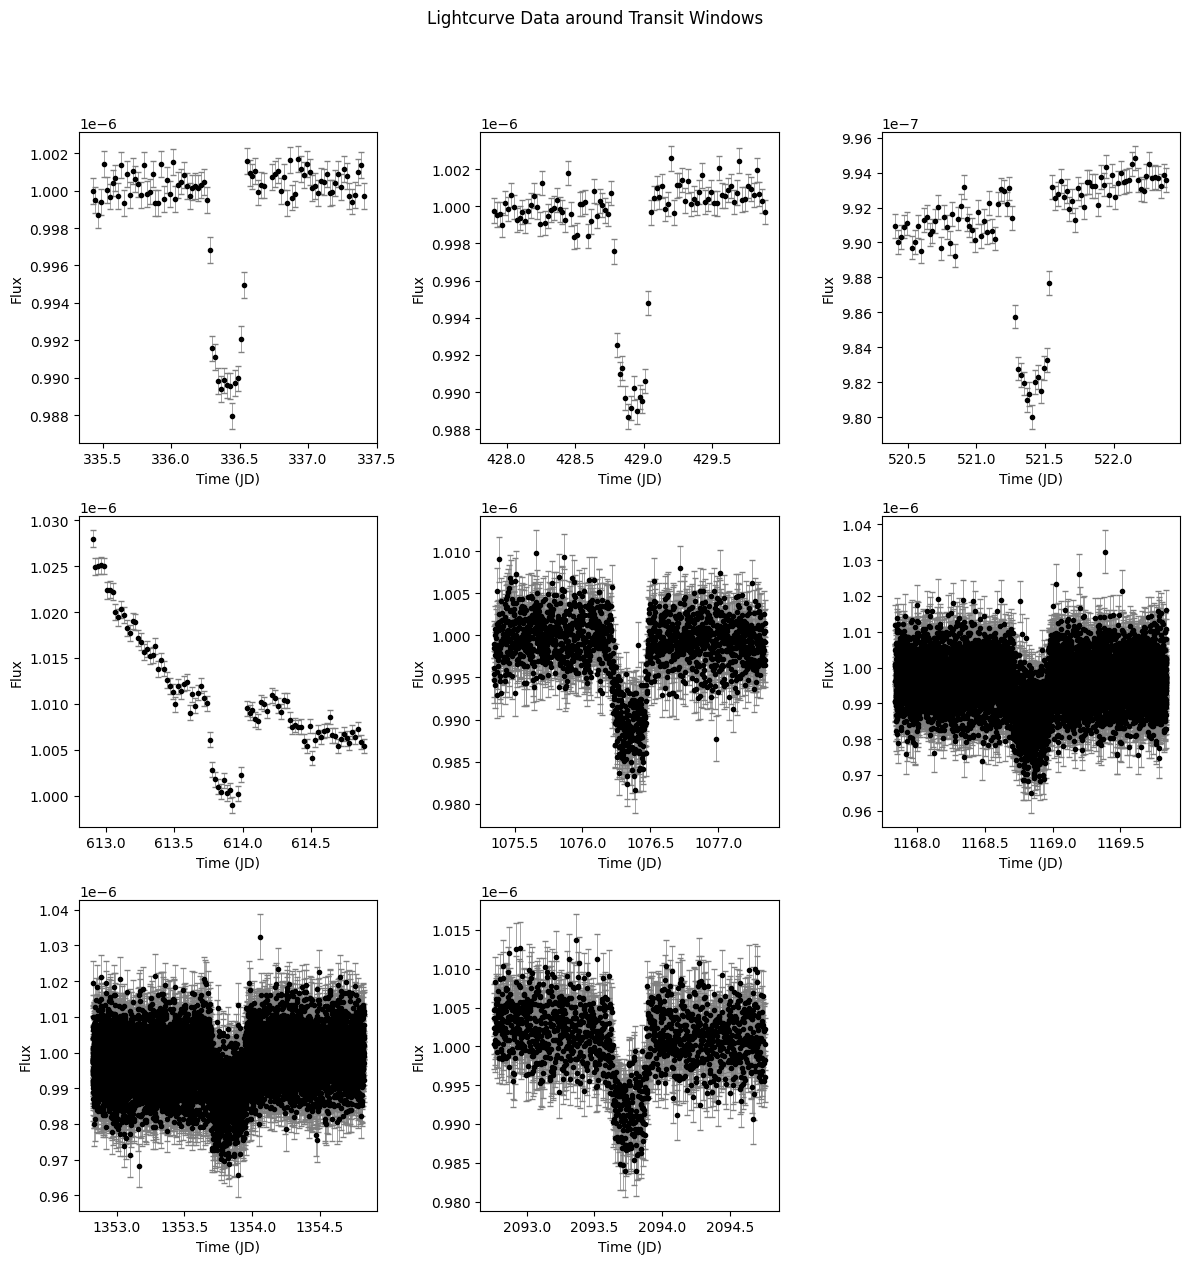

In [79]:
fixed_final_plot_transit_windows_grid(paperprep_lcs, t0=2076.346853, period=92.492, x=1, start_multiplier=-8, end_multiplier=11, n_columns=3, x_label="Time (JD)", y_label="Flux", subplot_title="", y_scale=10e5,  main_title="Lightcurve Data around Transit Windows", save_path="toi4409-transit-windows_offset.png", offset_jd = -1000.0) 

C:\Users\patri\AppData\Local\Temp\ipykernel_44984\2280870471.py:62: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_xticks)


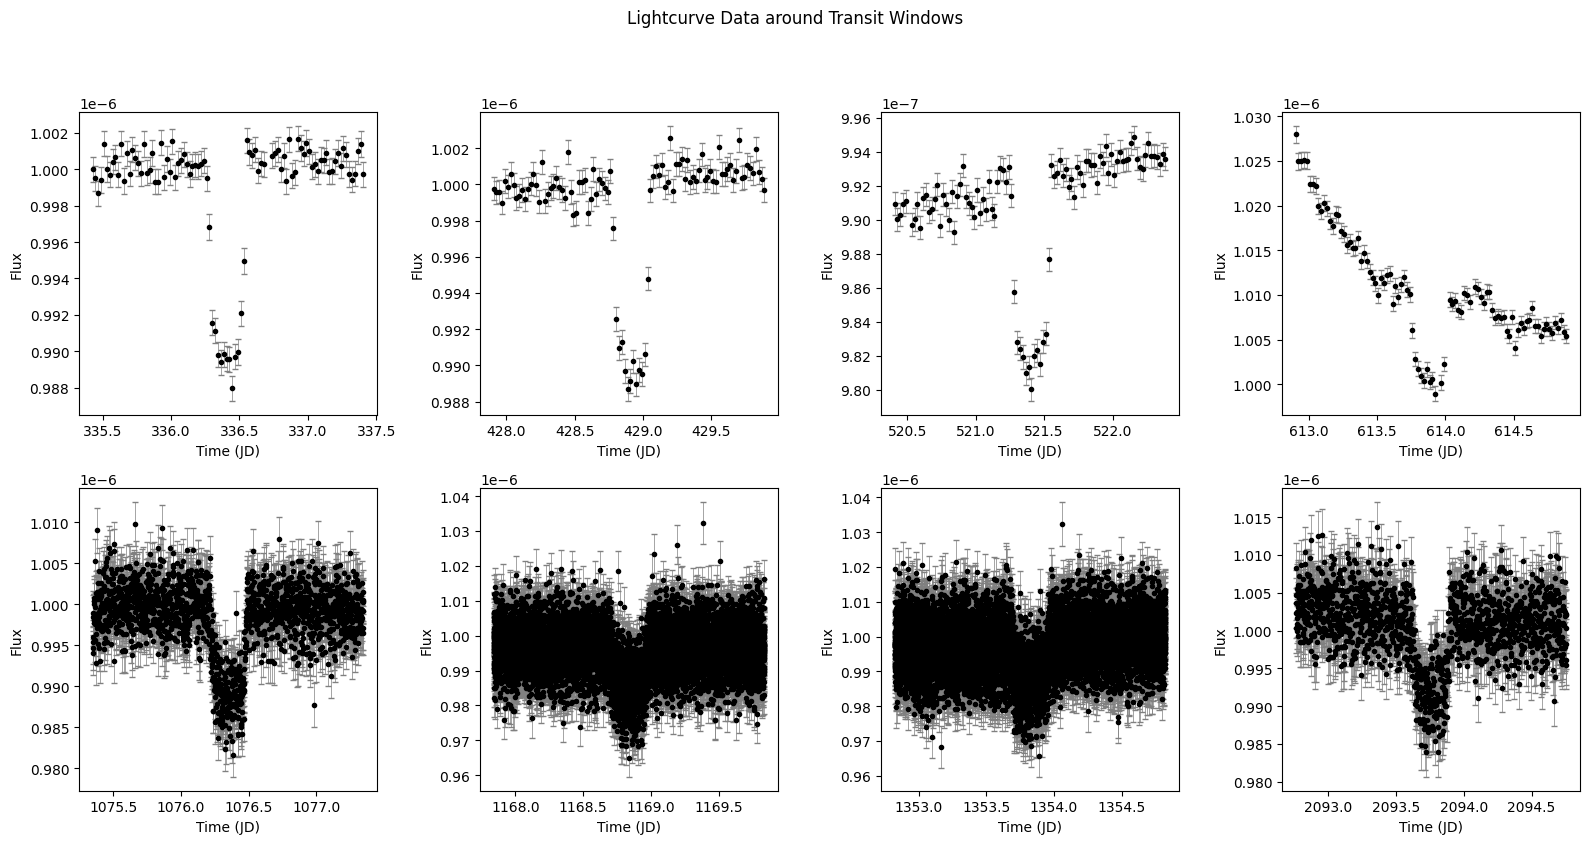

In [82]:
fixed_final_plot_transit_windows_grid(paperprep_lcs, t0=2076.346853, period=92.492, x=1, start_multiplier=-8, end_multiplier=11, n_columns=4, x_label="Time (JD)", y_label="Flux", subplot_title="", y_scale=10e5,  main_title="Lightcurve Data around Transit Windows", save_path="toi4409-transit-windows_offset.png", offset_jd = -1000.0) 

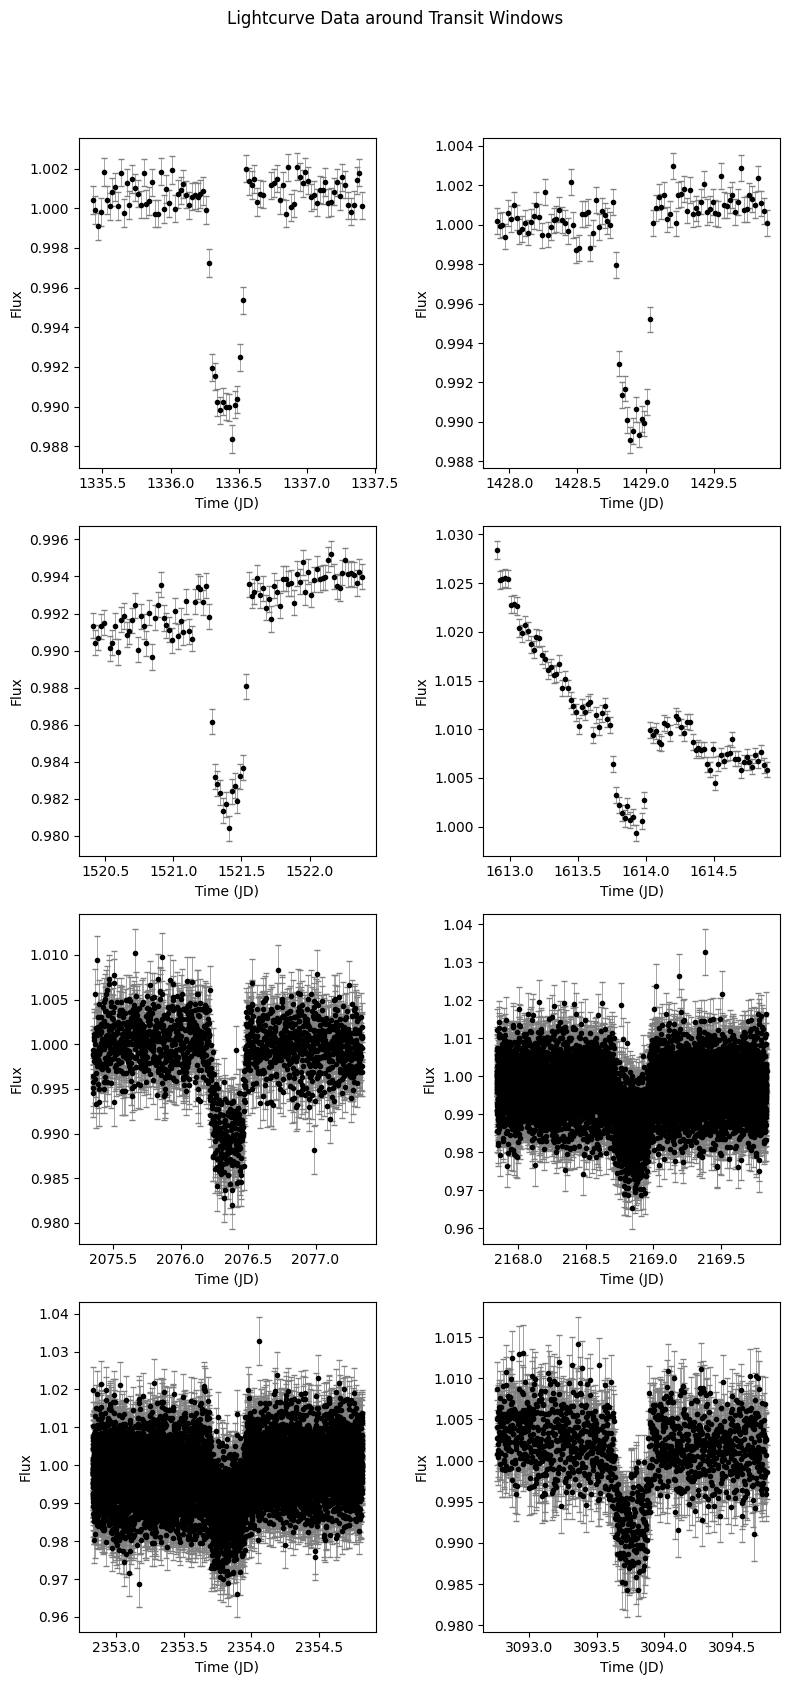

In [ ]:
fixed_final_plot_transit_windows_grid(paperprep_lcs, t0=2076.346853, period=92.492, x=1, start_multiplier=-8, end_multiplier=11, n_columns=2, x_label="Time (JD)", y_label="Flux", subplot_title="", y_scale=10e5,  main_title="Lightcurve Data around Transit Windows", save_path="toi4409-transit-windows-2cols.png") 

In [ ]:
# Save the plot
plt.savefig('toi4409-transit-windows.jpeg')

<Figure size 640x480 with 0 Axes>

<Axes: xlabel='Phase [JD]', ylabel='Flux'>

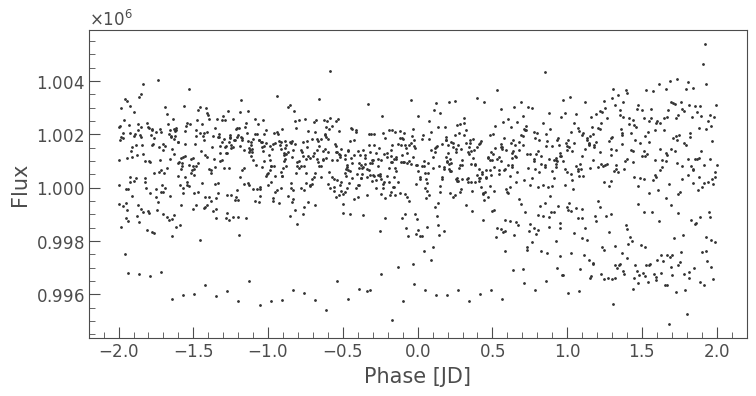

In [ ]:
# Fold this new LightCurve on the period and epoch of the transit
lc_folded_2 = lc.fold(period=92.492, epoch_time=2459076.346853)
# Cut 1 day before and after the transit
lc_folded_2 = lc_folded_2[(lc_folded_2.time < 2) & (lc_folded_2.time > -2)]
lc_folded_2.scatter()

In [ ]:
# Print the amount of data points in lc_processed
print(len(lc_processed)) # 1325547 / 25k = 53.xxx = 53

# From lc_processed, make all points an average, so that the data size has a total of 25000 points
lc_processed_binned = lc_processed.bin(binsize=53)
lc_processed_binned.plot();


1325547


/tmp/ipykernel_20238/3870013359.py:5: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and will be removed in a future version. 
        Use time_bin_size instead.
  lc_processed_binned = lc_processed.bin(binsize=53)


ValueError: shape mismatch: value array of shape (27413,) could not be broadcast to indexing result of shape (18448,)

In [ ]:
lc_processed_binned

NameError: name 'lc_processed_binned' is not defined

In [ ]:
# Save the binned data as a CSV file
lc_processed_binned.to_csv('toi4409-tess-stitched-binned25k.csv')


In [ ]:
# Shift the X axis so that the 2076.346853 value is at 0, without folding, by substacting the value from the time column
# lc_processed_shifted = 

# Plot the shifted data
# lc_processed_shifted.scatter()

AttributeError: object has no attribute shift

In [ ]:
folded = lc_processed.fold(period=92.492, t0=(2459076.346853-2457000)*u.day)

<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

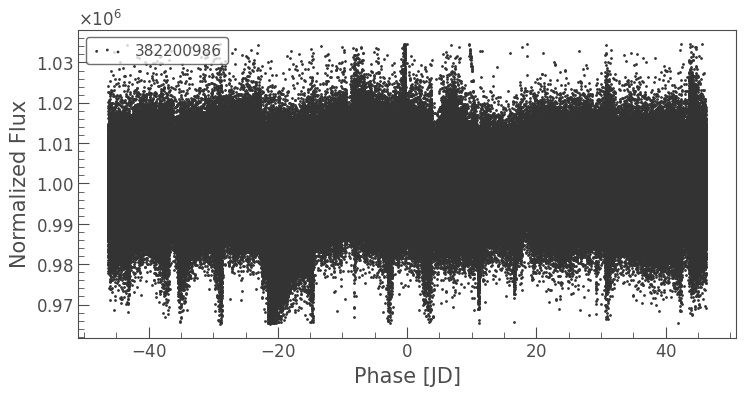

In [ ]:
folded.scatter()

In [ ]:
folded2 = lc_processed.fold(period=92.492, t0=(2459076.346853-2457000)*u.day)

/home/codespace/.python/current/lib/python3.10/site-packages/astropy/utils/decorators.py:604: LightkurveDeprecationWarning: "t0" was deprecated in version 2.0 and will be removed in a future version. Use argument "epoch_time" instead.
  return function(*args, **kwargs)


<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

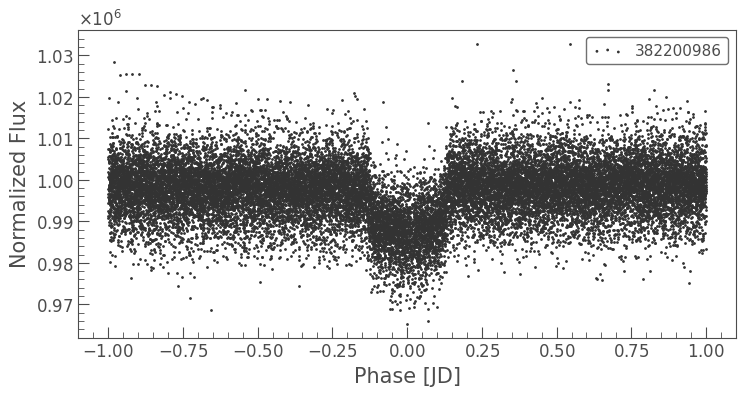

In [ ]:
# Cut data from phase -1 to 1
folded_11 = folded2[(folded2.phase > -1) & (folded2.phase < 1)]
folded_11.scatter()

In [ ]:
# Export the data as a CSV file
folded_11.to_csv('toi4409-tess-folded.csv')

<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

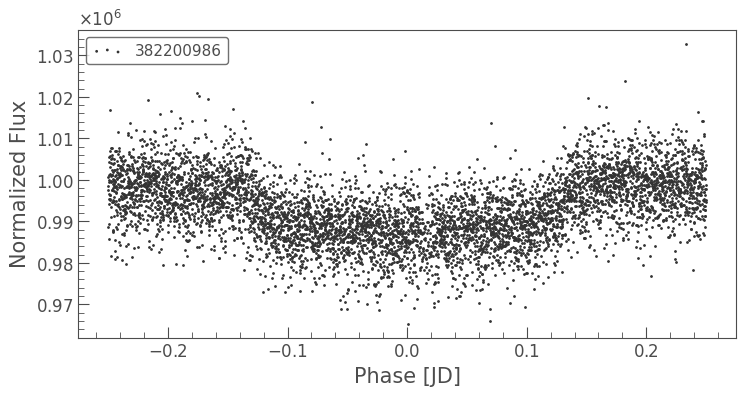

In [ ]:
# Cut the phase from -0.25 to 0.25
folded_025 = folded2[(folded2.phase > -0.25) & (folded2.phase < 0.25)]
folded_025.scatter()


In [ ]:
# Export the data as a CSV file
folded_025.to_csv('toi4409-tess-folded-025.csv')


<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

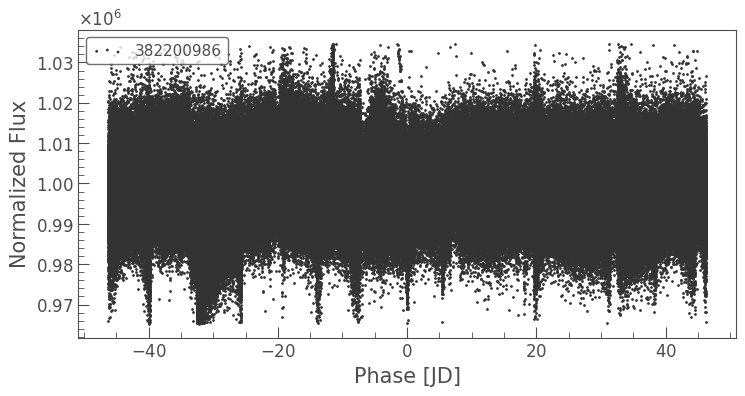

In [ ]:
folded2.scatter()